# Intro

## Machine Learning (ML)

TODO <br>
think at a better intro

- Machine Learning is a way to find patterns in our data and based on these patterns to make new predictions.
- ML is about the task of learning a mapping function from inputs to outputs.
- for each step, give refernces to other most advanceds solutions





### ML use-cases
[Digit recognition](http://bit.ly/2x8FF2s) <br>
Our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images <br>

[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) <br>
We need to predict if a person survived or didn't survive on Titanic

[Predict Future Sales](https://www.kaggle.com/c/competitive-data-science-predict-future-sales) <br>
We need to predict total sales for every product and store in the next month <br>

Above ML use-cases are extracted from Kaggle competitions. Kaggle is the most popular online platform where we can test, learn and share our ML skills. <br>

If we start to think at the big companies which we are using daily, like Facebook, Google, Amazon, Twitter... most of them functionalities are implemented using ML. <br>

I'm almost sure that if you start to think for 5 minutes, you can see some functionalities from you project/product which can be implemented with ML.





## ML requirements
<b>Data</b> <br>
To develop a ML project, first we need a dataset. <br>

There are hundreds of dataset available online for free and waiting to be used !
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [ask google](https://www.google.com/search?ei=R2QMXZD9MNaD8gL4uYPoCw&q=machine+learning+open+datasets&oq=machine+learning+open+datasets&gs_l=psy-ab.3..0i203j0i8i30.5101.6297..6496...1.0..0.128.673.0j6......0....1..gws-wiz.......0i71j35i304i39j0i7i30j0i13j0i8i7i30j0i7i30i19j0i8i7i30i19j0i19j0i8i13i30i19.lyx-wjPDejE)

If we don't already have in place a dataset, we need first to plan how to collect and store our data. <br>
This phase of how to store the data is very important, because based on it rely most our ML project work. <br>
It is well known that approx. 80% from a ML project development is spend on data exploration, data cleaning, data transformation.

<i>data cleaning examples and tools used for it... </i>

<b>Software (ML libraries) </b> <br>
Yes, it's true that ML algorithms are based on mathematic. But it's also true that most of these algorithms are already implemented in a lot of libraries, so we don't need to know all the math details. <br>
Most of the time, is it enough to have a general understanding of what a ML algorithm does to apply it with success on our project. Of course, if you deep dive into the details implementation, you will start to master it and if you master something you will have a better success. <br>

OK, we know that there are ML libraries to use but what programming languages do we need to know to use them ? The most common ones are Python and R. There are also libraries written for example in Java, .Net, Scala, but either are in to early stage, implement only a few algorithms, those algorithms aren't the most efficent ones implemented and have a weak comunity/suport behind them. <br>

Python and R are the most common programming languages when it's about ML. Python has the advantage that has a strong and large community itself and also that the latest best ML libraries support Python. R language was very used in the past, but it seems to have a descending path in the last years. 

Most common Python libraries : (look in how to win a kaggle competition for other libraries)
- Scikit-learn
- Spark ML
- Theano
- TensorFlow
- Keras
- PyTorch

<i> explain differences between libraries </i>


Nowadays, it's pretty easy to install and use these libraries. We can either install them on our personal computers or access them from cloud services. Just to see how important and useful are them for software industry, the biggest cloud providers created services around them :
- amazon
- microsoft
- google
- lentiq or bigstep ?

<i>link references</i>


<b>Hardware</b> <br>
Every software needs hardware. This is the case also for ML. <br>
Hardware specifications are related to the type of project and mostly to the volume of data. If the volume of data if big, we clearly will need more power(CPU, memory) to proccess it. <br>

For computer vision, is indicated to have a [GPU](https://en.wikipedia.org/wiki/Graphics_processing_unit), a good processor and few tens of memory gigabytes. For traditional ML datasets, where most of the time we have [structure data](https://en.wikipedia.org/wiki/Data_structure) and few hundreds, gigabytes of data is enough a commodity hardware(ex. 4 cores, 8 GBs RAM) . <br>

BUT, if you want to start learning ML, hardware is not an escuse. You can find a small dataset, a lightweight library and this will ran very fast even on the cheapest laptop/PC. <br>

If you are not sure that ML if for you and you are skeptical about investing for hardware, you can choose a cloud solution. In this case you can rent hardware and pay as much as you consume. Nowadays, these services are pretty cheap. <i> look for prices </i>

 



## Our workshop setup

Dataset
- [Titanic dataset](https://data.world/nrippner/titanic-disaster-dataset)

Software 
- [jupyter notebook](https://jupyter.org/)
- [python](https://www.python.org/)
- [sklearn](https://scikit-learn.org/stable/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [woodpecker](https://github.com/tlapusan/woodpecker)

Hardware
- [Lentiq](https://lentiq.com/)
- Your own laptop


<i> workshop general steps </i>

# Classification algorithms - DecisionTree and RandomForest

- read the data
- data exploration
- data cleaning and data transformation
- initializing and fitting ML models
- model validation
- model structure interpretation
- hyperparameter tuning

## Imports

Imports in Python, as in any other programming language, are the ways to include other library funtionalities.

Read more from [official docs](https://docs.python.org/3/reference/import.html) about Python imports

In [106]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

from graphviz import Source
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import sys
sys.path.append(f"/Users/tudorlapusan/Documents/workspaces/ml/woodpecker/")
from woodpecker.decision_tree_structure import DecisionTreeStructure


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
pd.options.display.max_columns = 999

## Dataset

What are we trying to solve today ?

The dataset is related to the sinking of the Titanic ship. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

<b>Our goal is to predict which passengers survived the tragedy ! </b> <br>


Depending of what we need to predict, the ML algorithms are devided in two main subclasses : <br>
<b>Classification </b>
- we need to predict a class/label (a limited set of values), ex. email is span or not spam, healty or not healty
- the most common is the binary classification, where we need to predict between two classes
- when we need to predict multiple classes, the problem is known as multi-class classification

<b>Regression </b>
- we need to predict a real-value, such as an integer or floating point value, ex price, age, distance 

[Differences between Classification and Regression](https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/)

Above subclasses of algorithms are making part from supervised learning. Why? Because we trained the algorithms based on a known label y (ground truth). Unsupervised learning, on the other hand, does not have labels, so its goal is to infer the natural structure present within a set of data points. [Read more](https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d)

<i> examples of supervized/unsupervised algorithms </i>

### Read the data

In [4]:
dataset = pd.read_csv("../dataset/titanic/titanic.csv")

In [5]:
dataset.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,True,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,True,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,False,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,True,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,False,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


Any machine learning algorithm needs data from where to learn and make relevant predictions ! <br>
In our world, we can find a lot of dataset types, like structure datasets, raw text, images, video, sounds, etc.



[Pandas](http://pandas.pydata.org/) is the most popular library in Python for working with structured datasets. 

During the development of a ML project, working with data is typically devided into multiple stages :
- data transformation and data cleaning
- data analysis, visualisations
- data modeling using ML algorithms

Pandas is the ideal tool for all of these tasks. The main data structures in Pandas are Series (1-dimensional) and DataFrame (2-dimensional).

Pandas DataFrame (can be seen as a SQL table) :
- easy handling of missing data
- add/delete columns 
- powerfull groupby, joins funtionalities
- can read from CSV, excel, databases, json, parquet, etc


[Official docs](http://pandas.pydata.org/pandas-docs/stable/) <br>
[Python for Data Analysis book](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793)





## Initial data analysis

TODO - show few of jupyter shortcuts, like show method documentation <br>
TODO - understand better the shorcut descriptionn <br>
TODO - save intermediary dataset results  <br>
TODO - apply feature encoding separately on train and validation


When working on a ML project we can start with at least two approaches : <br><br>
<b>Data driven approach</b><br>
It assume to start looking at the data, to make a lot of visualisations, discover patterns. By doing this we are making a lot of assumptions about the data and what kind of information we should put in our ML model. <br>
In this way, the model will learn only from our assumptions, which in some cases can be limited or incorect.


<b>ML drive approach </b><br>
This approach assume to look at the data just enough to make it ready for training a ML model (handle missing values, categorical features, etc). After we have a model trained on this data, we interprete its result, structure, behavior and based on these investigations we make assumptions about the data.

<br>
Choose which one fits for you !

### Columns description
<b>pclass </b>: A proxy for socio-economic status (SES). 1st = Upper, 2nd = Middle, 3rd = Lower <br>
<b>survived</b> : True = survived, False = didn't survive <br>
<b>name</b> : passanger name <br>
<b>sex</b> : passanger sex, male or female <br>
<b>age</b> : passanger age <br>
<b>sibsp</b> : # of siblings / spouses aboard the Titanic <br>
<b>parch</b> : # of parents / children aboard the Titanic <br>
<b>ticket</b> : passanger ticket number <br>
<b>fare</b> : passenger fare <br>
<b>embarked</b> : Port of embarkation, C = Cherbourg, Q = Queenstown, S = Southampton <br>

In [6]:
dataset.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S


### Dataset size

In [7]:
dataset.shape

(1309, 11)

### Check column datatypes

In [8]:
dataset.dtypes

pclass        int64
survived       bool
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

### Column summarize

In [9]:
dataset.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.837836,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


### Visualisations
We understand better and faster if we look visually at the data. <br>
Python community developed a lot of useful libraries for visualistions, but the most used one is [matplotlib](https://matplotlib.org/). Check [here](https://mode.com/blog/python-data-visualization-libraries) for other popular libraries. <br> 


The most common types of visualisations are histograms, line plots and scatter plots.

In [10]:
dataset.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,True,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,True,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,False,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,True,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,False,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


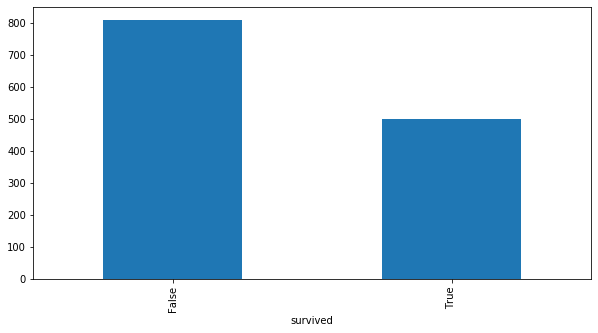

In [11]:
dataset.groupby(["survived"]).size().plot.bar(figsize=(10,5))

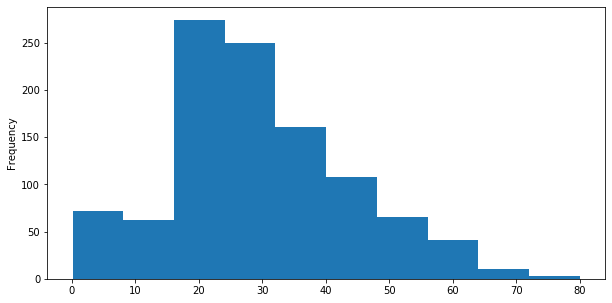

In [12]:
dataset.age.plot.hist(figsize=(10,5))

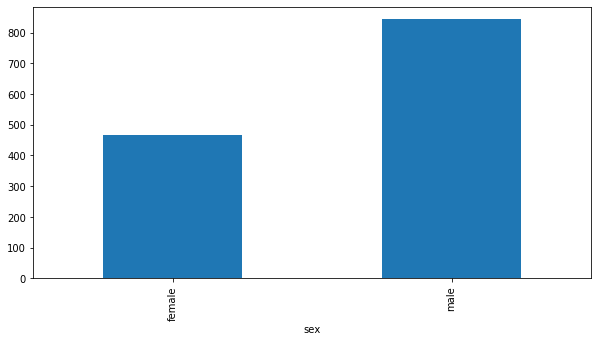

In [13]:
dataset.groupby(["sex"]).size().plot.bar(figsize=(10,5))

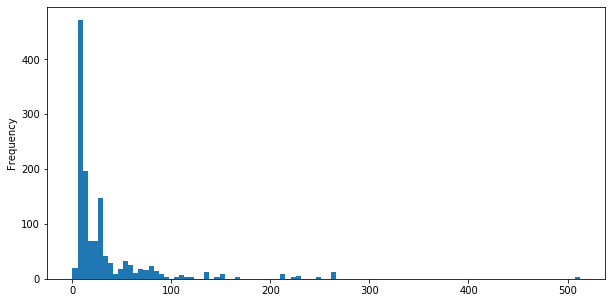

In [14]:
dataset.fare.plot.hist(figsize=(10,5), bins=100)

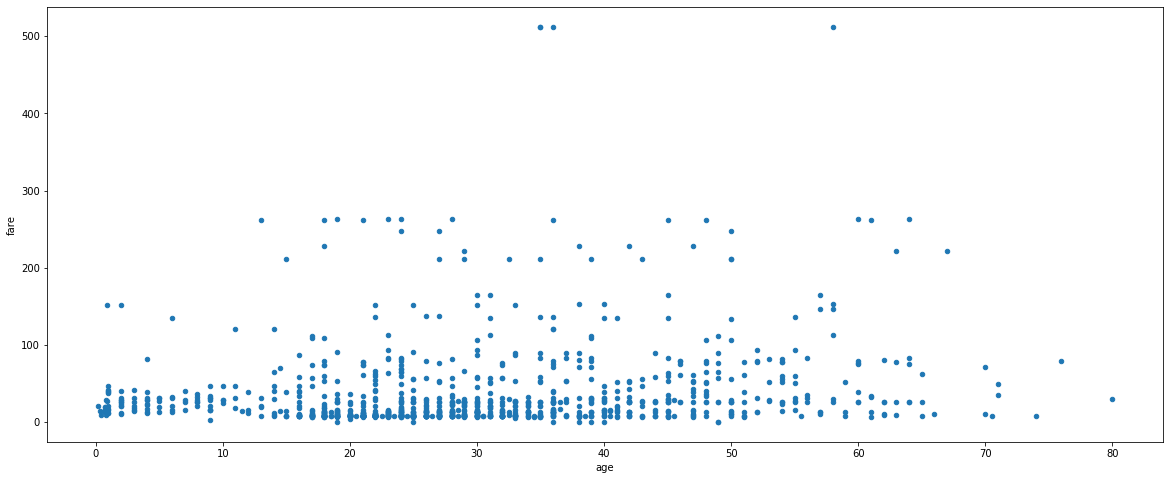

In [15]:
dataset.plot.scatter(x="age", y = "fare", figsize=(20,8))

### Workshop work
- create other visualisations

<i>vis for correlations</i>

## Decision Tree Classifier

Most of the time, the datasets we have are not ready to be used by a machine learning algorithm. We need to clean them and maybe also to tranform them into another values.

A machine learning algorithm understand a dataset using its features (X) and target variable (y) ! <br>
Features are the input properties from the dataset, on which the model is trained to make good predictions for target variable. 


Main advantages of Decision Trees 
- they are interpretable
- they are fast to train
- they have good results
- easy to understand

TODO <BR>
Find a way/place to present in very high level how decision tree works and are build <br>
Get notes from here : https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
Regression splitting criteria. std ? https://scikit-learn.org/stable/modules/tree.html#regression-criteria
    
<i> explain how decision tree is build </i>

![Decision tree](../resources/images/decision_tree_classifier_sample.png)


Node impurity and Information Gain

In [179]:
def get_gini(samples):
    return samples[0]/sum(samples)*(1-samples[0]/sum(samples)) + samples[1]/sum(samples)*(1-samples[1]/sum(samples))
    

In [218]:
def get_ig(s1, s2, s3):
    print(get_gini(s1))
    print((sum(s2)/sum(s1)*get_gini(s2)))
    print(sum(s3)/sum(s1)*get_gini(s3))
    return get_gini(s1) - ((sum(s2)/sum(s1)*get_gini(s2) + sum(s3)/sum(s1)*get_gini(s3)))

In [219]:
samples = [1, 25]

In [220]:
get_ig([20,30], [10,10], [10,20])

0.48
0.2
0.26666666666666666


0.013333333333333308

In [221]:
get_ig([20,30], [19,5], [1,25])

0.48
0.15833333333333335
0.03846153846153845


0.28320512820512816

### Feature selection
Is the process where we need to decide which features to select for training our ML algorithm

In [16]:
dataset.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,True,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,True,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,False,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,True,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,False,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


In [17]:
feature_set_v1 = ["sex", "age", "fare", "embarked"]
target = "survived"

### Initializing and training a DecisionTreeClassifier

In [18]:
dt_v1 = DecisionTreeClassifier(max_depth=5)

In [19]:
dt_v1.fit(dataset[feature_set_v1], dataset[target])

ValueError: could not convert string to float: 'female'

### Feature encoding

In [ ]:
dataset.head(10)

In Machine Learning we have two main types of features : <br>
- <b>Numerical features </b> <br>
    Like age, balance, duration,
- <b>Categorical features</b>
    - nominal features <br>
    We don't have any logical order for feature values. ex. job, marital, housing, loan,
    - ordinal features <br>
    We have a logical order. ex. education, month, 

There are many ways to convert a categorical feature into a numerical one, almost each ML related library contains one. <br>

One of the most populars are : <br>
sklearn : [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) <br>
pandas : [Categorical data](http://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

<br>
<b>Pandas categorical data types </b><br>
Categorical data types are using integer values  to represent the raw values from a column. <br>
Behind, pandas is using a dictionary to keep all the mappings between integer values and raw values. Beside encoding functionality, categorical values can be used for memory saving.
 


In [20]:
# convert a string type to categorical type
dataset.sex.astype("category")

0       female
1         male
2       female
3         male
4       female
5         male
6       female
7         male
8       female
9         male
10        male
11      female
12      female
13      female
14        male
15        male
16        male
17      female
18      female
19        male
20        male
21      female
22        male
23      female
24      female
25        male
26        male
27      female
28      female
29        male
         ...  
1279    female
1280      male
1281      male
1282      male
1283      male
1284      male
1285      male
1286    female
1287      male
1288      male
1289      male
1290    female
1291      male
1292      male
1293      male
1294      male
1295      male
1296      male
1297      male
1298      male
1299      male
1300    female
1301      male
1302      male
1303      male
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: category
Categories (2, object): [female, male]

In [21]:
dataset.sex.astype("category").cat.codes

0       0
1       1
2       0
3       1
4       0
5       1
6       0
7       1
8       0
9       1
10      1
11      0
12      0
13      0
14      1
15      1
16      1
17      0
18      0
19      1
20      1
21      0
22      1
23      0
24      0
25      1
26      1
27      0
28      0
29      1
       ..
1279    0
1280    1
1281    1
1282    1
1283    1
1284    1
1285    1
1286    0
1287    1
1288    1
1289    1
1290    0
1291    1
1292    1
1293    1
1294    1
1295    1
1296    1
1297    1
1298    1
1299    1
1300    0
1301    1
1302    1
1303    1
1304    0
1305    0
1306    1
1307    1
1308    1
Length: 1309, dtype: int8

In [22]:
def encode_columns_as_categories(_dataset, _column_set):
    for column in _column_set:
        _dataset[f"{column}_cat"] = _dataset[column].astype("category").cat.codes

In [23]:
encode_columns_as_categories(dataset, ["sex", "embarked"])


In [24]:
dataset.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,sex_cat,embarked_cat
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,0,2
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,2
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,2
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,1,2
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,2
5,1,True,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,1,2
6,1,True,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,0,2
7,1,False,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,1,2
8,1,True,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,0,2
9,1,False,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,1,0


In [25]:
dataset.dtypes

pclass            int64
survived           bool
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
sex_cat            int8
embarked_cat       int8
dtype: object

In [26]:
feature_set_v2 = ["sex_cat", "age", "fare", "embarked_cat"]

In [27]:
dt_v2 = DecisionTreeClassifier(max_depth=5)
dt_v2.fit(dataset[feature_set_v2], dataset[target])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Handle missing values

TODO
- more details

In [28]:
dataset[feature_set_v2].isna().any()

sex_cat         False
age              True
fare             True
embarked_cat    False
dtype: bool

In [29]:
dataset.age.median()

28.0

In [30]:
dataset["age_missing"] = dataset.age.isna()
dataset.fillna({"age":dataset.age.median()}, inplace = True)

### workshop work

In [31]:
dataset.fare.median()

14.4542

In [32]:
dataset["fare_missing"] = dataset.fare.isna()
dataset.fillna({"fare" : dataset.fare.median()}, inplace=True)

In [33]:
dataset[feature_set_v2].isna().any()

sex_cat         False
age             False
fare            False
embarked_cat    False
dtype: bool

In [34]:
feature_set_v3 = ["sex_cat", "age", "age_missing", "fare", "fare_missing", "embarked_cat"]

In [35]:
dt_v3 = DecisionTreeClassifier(max_depth=3)
dt_v3.fit(dataset[feature_set_v3], dataset[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

We succeded to train our DecisionTreeClassifier model !!! <br>
To reach this step, we needed to read the dataset, to know what we are trying to solve and to make the dataset ready for the model. <br>
We needed to encode categorical features into numerical features and to handle missing data. These operations are known under the concept of feature engineering. <br>
In our case, we spend only a few time on feature enginner, but in real use-cases we need to spend a lot of time, mostly because the dataset isn't in a good shape, like this one. Also, most of the time, a good feature enginner would reflect in an good model performance.








In [36]:
def save_decision_tree_structure(model_param, filename_param, features_param):
    graph = Source(tree.export_graphviz(model_param, feature_names=features_param, class_names=["0", "1"],
                                                filled=True, node_ids=True))
    graph.format = 'png'
    graph.render(filename=filename_param,view=True)

In [37]:
#save_decision_tree_structure(dt_v2, "decision_tree_classifier_sample", features_param=feature_set_v3)

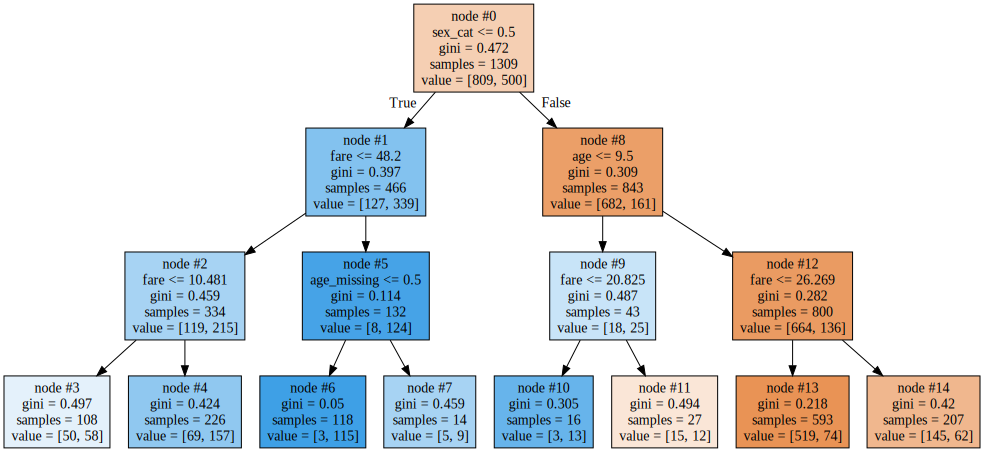

In [38]:
dts = DecisionTreeStructure(dt_v3, dataset, feature_set_v3, target)
dts.show_decision_tree_structure(rotate=False)

### Prediction description

Let's take 10 random samples from our dataset.

In [39]:
dataset_predictions = dataset.sample(frac=1).head(10)

In [40]:
dataset_predictions[feature_set_v3]

,sex_cat,age,age_missing,fare,fare_missing,embarked_cat
1193,1,28.0,True,7.7250,False,1
990,1,29.0,False,7.9250,False,2
862,0,22.0,False,8.9625,False,2
47,1,42.0,False,26.2875,False,2
160,0,44.0,False,57.9792,False,0
960,1,34.5,False,6.4375,False,0
265,1,28.0,False,35.5000,False,2
1156,0,2.0,False,20.2125,False,2
1011,0,19.0,False,16.1000,False,2
18,0,32.0,False,76.2917,False,0


DecisionTreeClassifier contains predict and predict_proba methods for making predictions : <br>
- predict method returns the predicted class 
- predict_proba returns the class probabilities 

In [41]:
dt_v3.predict(dataset_predictions[feature_set_v3])

array([False, False,  True, False,  True, False, False,  True,  True,
        True])

In [42]:
dt_v3.predict_proba(dataset_predictions[feature_set_v3])

array([[0.87521079, 0.12478921],
       [0.87521079, 0.12478921],
       [0.46296296, 0.53703704],
       [0.70048309, 0.29951691],
       [0.02542373, 0.97457627],
       [0.87521079, 0.12478921],
       [0.70048309, 0.29951691],
       [0.30530973, 0.69469027],
       [0.30530973, 0.69469027],
       [0.02542373, 0.97457627]])

### Model validation

The role of model validation is to check the model performance and how it will perform in production environment ! <br>

The most common model validation metric for classification algorithms is accuracy metric. It tells us the percentage of corrent predictions made by our model, in others words accuracy = (number of corrent predictions / total number of predictions). <br>
[Check for others validation metrics for classification](https://scikit-learn.org/stable/modules/classes.html#classification-metrics)



In [43]:
accuracy_score(dataset[target], dt_v3.predict(dataset[feature_set_v3]))

0.787624140565317

### Validation strategies  

The rule number one : validation strategy should reflect as much as possible how the model will behave in production. <br>

The most common validation strategy is holdout method, where we split our dataset in two parts, training and validation datasets. <br>
One splitting method would be to shuffle the data and choose 70% of them in training and 30% into validation. 

In [44]:
random_state = 1987

In [45]:
train, validation = train_test_split(dataset, train_size=0.7, random_state=random_state, stratify = dataset.survived)

In [46]:
print(f"train size {train.shape[0]}")
print(f"validation size {validation.shape[0]}")

train size 916
validation size 393


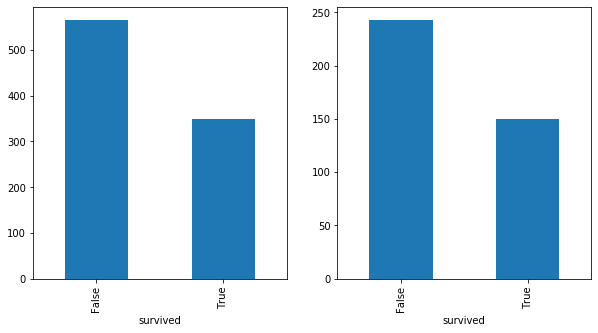

In [47]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
train.groupby("survived").size().plot.bar()
plt.subplot(1,2,2)
validation.groupby("survived").size().plot.bar()

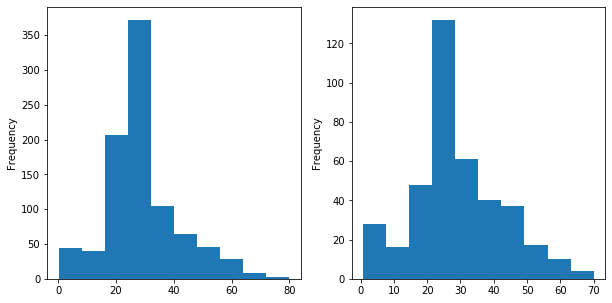

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
train.age.plot.hist()
plt.subplot(1,2,2)
validation.age.plot.hist()

In [131]:
dt_v4 = DecisionTreeClassifier(max_depth=5, random_state=random_state, class_weight=None)
dt_v4.fit(train[feature_set_v3], train[target])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1987, splitter='best')

In [132]:
print(f"training accuracy {accuracy_score(train[target], dt_v4.predict(train[feature_set_v3]))}")
print(f"validation accuracy {accuracy_score(validation[target], dt_v4.predict(validation[feature_set_v3]))}")

training accuracy 0.8275109170305677
validation accuracy 0.7506361323155216


In [52]:
validation["prediction"]= dt_v4.predict(validation[feature_set_v3])

/Users/tudorlapusan/Documents/workspaces/ml/workshops/tree_based_models_workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
feature_set_v3

['sex_cat', 'age', 'age_missing', 'fare', 'fare_missing', 'embarked_cat']

In [54]:
validation.groupby(["survived", "prediction", "sex_cat"]).size()

survived  prediction  sex_cat
False     False       0            1
                      1          191
          True        0           42
                      1            9
True      False       0            2
                      1           52
          True        0           88
                      1            8
dtype: int64

TODO
- explain overfitting and underfitting

### Model interpretation

In [55]:
dts = DecisionTreeStructure(dt_v4, train, feature_set_v3, target)

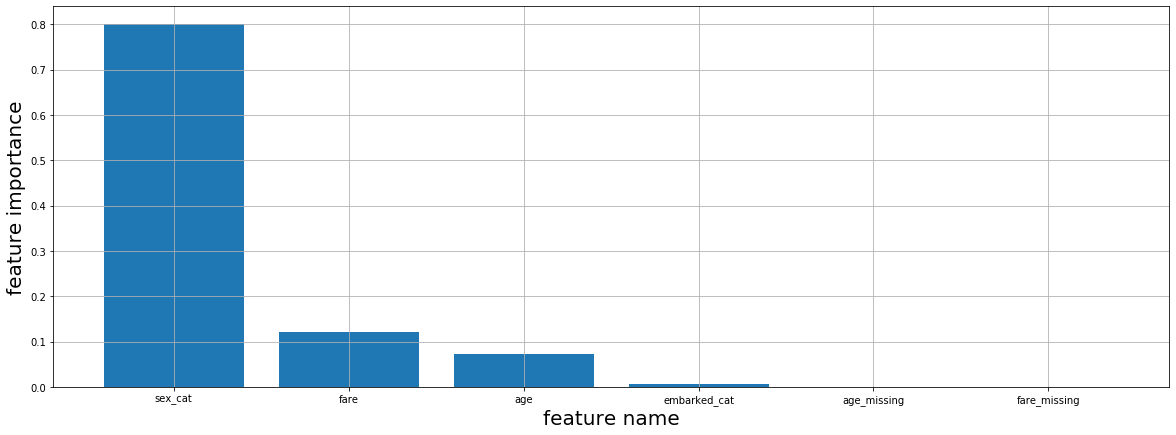

In [56]:
dts.show_features_importance(figsize=(20,7))

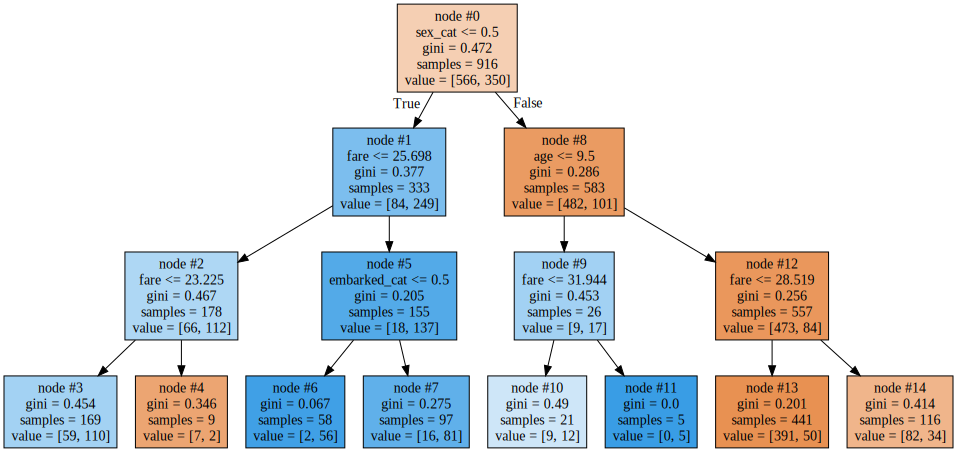

In [57]:
dts.show_decision_tree_structure(rotate=False)

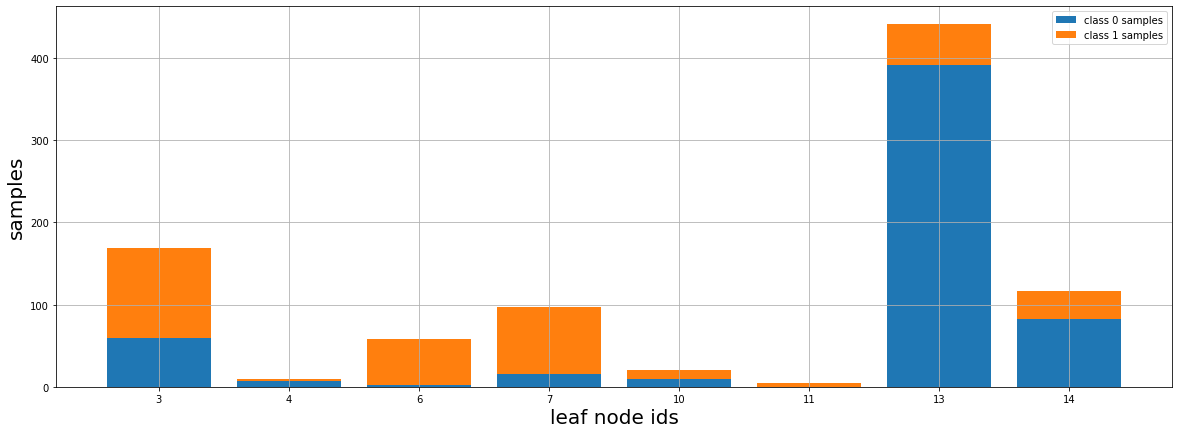

In [58]:
dts.show_leaf_samples_by_class(figsize=(20,7))

In [59]:
dts.get_node_samples(6).describe(include="all")

INFO - decision paths [[1 0 0 ... 1 1 0]
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 0 0 ... 1 1 0]
 [1 0 0 ... 1 1 0]
 [1 0 0 ... 1 1 0]] 


,sex_cat,age,age_missing,fare,fare_missing,embarked_cat,survived
count,58.0,58.000000,58,58.000000,58,58.000000,58
unique,NaN,NaN,2,NaN,1,NaN,2
top,NaN,NaN,False,NaN,False,NaN,True
freq,NaN,NaN,53,NaN,58,NaN,56
mean,0.0,34.068966,NaN,114.599641,NaN,-0.034483,NaN
std,0.0,14.401343,NaN,102.640235,NaN,0.184059,NaN
min,0.0,1.000000,NaN,27.445800,NaN,-1.000000,NaN
25%,0.0,24.000000,NaN,50.988575,NaN,0.000000,NaN
50%,0.0,32.000000,NaN,80.000000,NaN,0.000000,NaN
75%,0.0,47.250000,NaN,134.500000,NaN,0.000000,NaN


In [60]:
dts.get_node_samples(6).describe(include="all")

,sex_cat,age,age_missing,fare,fare_missing,embarked_cat,survived
count,58.0,58.000000,58,58.000000,58,58.000000,58
unique,NaN,NaN,2,NaN,1,NaN,2
top,NaN,NaN,False,NaN,False,NaN,True
freq,NaN,NaN,53,NaN,58,NaN,56
mean,0.0,34.068966,NaN,114.599641,NaN,-0.034483,NaN
std,0.0,14.401343,NaN,102.640235,NaN,0.184059,NaN
min,0.0,1.000000,NaN,27.445800,NaN,-1.000000,NaN
25%,0.0,24.000000,NaN,50.988575,NaN,0.000000,NaN
50%,0.0,32.000000,NaN,80.000000,NaN,0.000000,NaN
75%,0.0,47.250000,NaN,134.500000,NaN,0.000000,NaN


### Hyperparameter tuning
Hyperparameters are those parameters we can set when we initialize a ML model. Their values can have a big impact 
into model performance.

How do we change them ? First we need to understand if our model is overfitting or underfitting and based on this information to change corresponding hyperparameters values.

Don’t exagerate and spend too much time to tune hyperparameters, especially in the first phase of the project. Would be recommended to spend that time for feature understanding, feature engineering.

Using max_depth = 3, we have a bigger accuracy for training set than the validation set. This means that if we increase the max_depth, our model will overfit even more.

In [61]:
train_accuracy = []
validation_accuracy = []
max_depth_values = [1, 2, 3, 5, 10, 30, 60, 100]
for depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(train[feature_set_v3], train[target])
    train_accuracy.append(accuracy_score(train[target], dt.predict(train[feature_set_v3])))
    validation_accuracy.append(accuracy_score(validation[target], dt.predict(validation[feature_set_v3])))

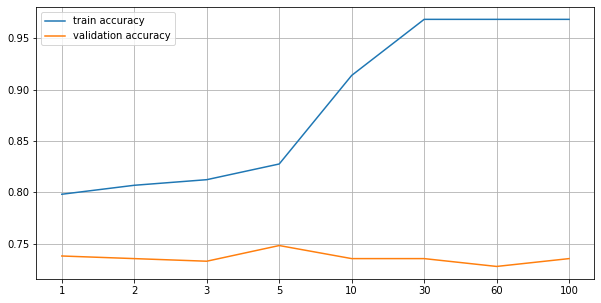

In [62]:
plt.figure(figsize=(10,5))
plt.xticks(range(0, len(max_depth_values)), max_depth_values)
plt.plot(train_accuracy, label="train accuracy")
plt.plot(validation_accuracy, label="validation accuracy")
plt.grid()
plt.legend()

max_depth is one of the most important hyperparameter for decision trees, but it seems that in this context it don't help too much. Let's look at other important [hyperparamenters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

#### min_samples_split
The minimum number of samples required to split an internal node

In [63]:
train_accuracy = []
validation_accuracy = []
min_samples_split_values = [2, 5, 10, 15, 20, 30, 40, 50]
for min_samples_split in min_samples_split_values:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(train[feature_set_v3], train[target])
    train_accuracy.append(accuracy_score(train[target], dt.predict(train[feature_set_v3])))
    validation_accuracy.append(accuracy_score(validation[target], dt.predict(validation[feature_set_v3])))

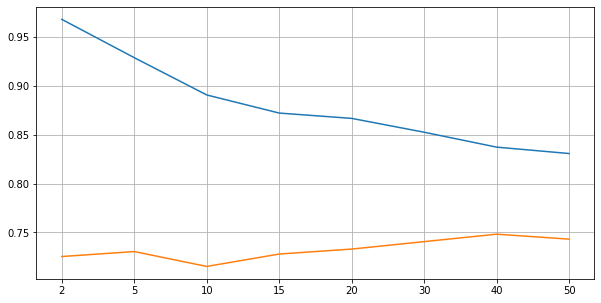

In [64]:
plt.figure(figsize=(10,5))
plt.xticks(range(0, len(min_samples_split_values)), min_samples_split_values)
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.grid()

#### min_samples_leaf
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. <br>

<b>write your own code </b>

#### Try multiple hyperparameters  
Trying multiple hyperparameter values in the same time can be done manually or [automatically](https://scikit-learn.org/stable/modules/grid_search.html).

In [65]:
hyperparameters_values = []
train_accuracy = []
validation_accuracy = []
max_depth_values = [1, 2, 3, 5, 10, 30, 60, 100]
min_samples_split_values = [2, 5, 10, 15, 20, 30, 40, 50]

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
        dt.fit(train[feature_set_v3], train[target])

        hyperparameters_values.append(f"{max_depth},{min_samples_split}")
        train_accuracy.append(accuracy_score(train[target], dt.predict(train[feature_set_v3])))
        validation_accuracy.append(accuracy_score(validation[target], dt.predict(validation[feature_set_v3])))
        

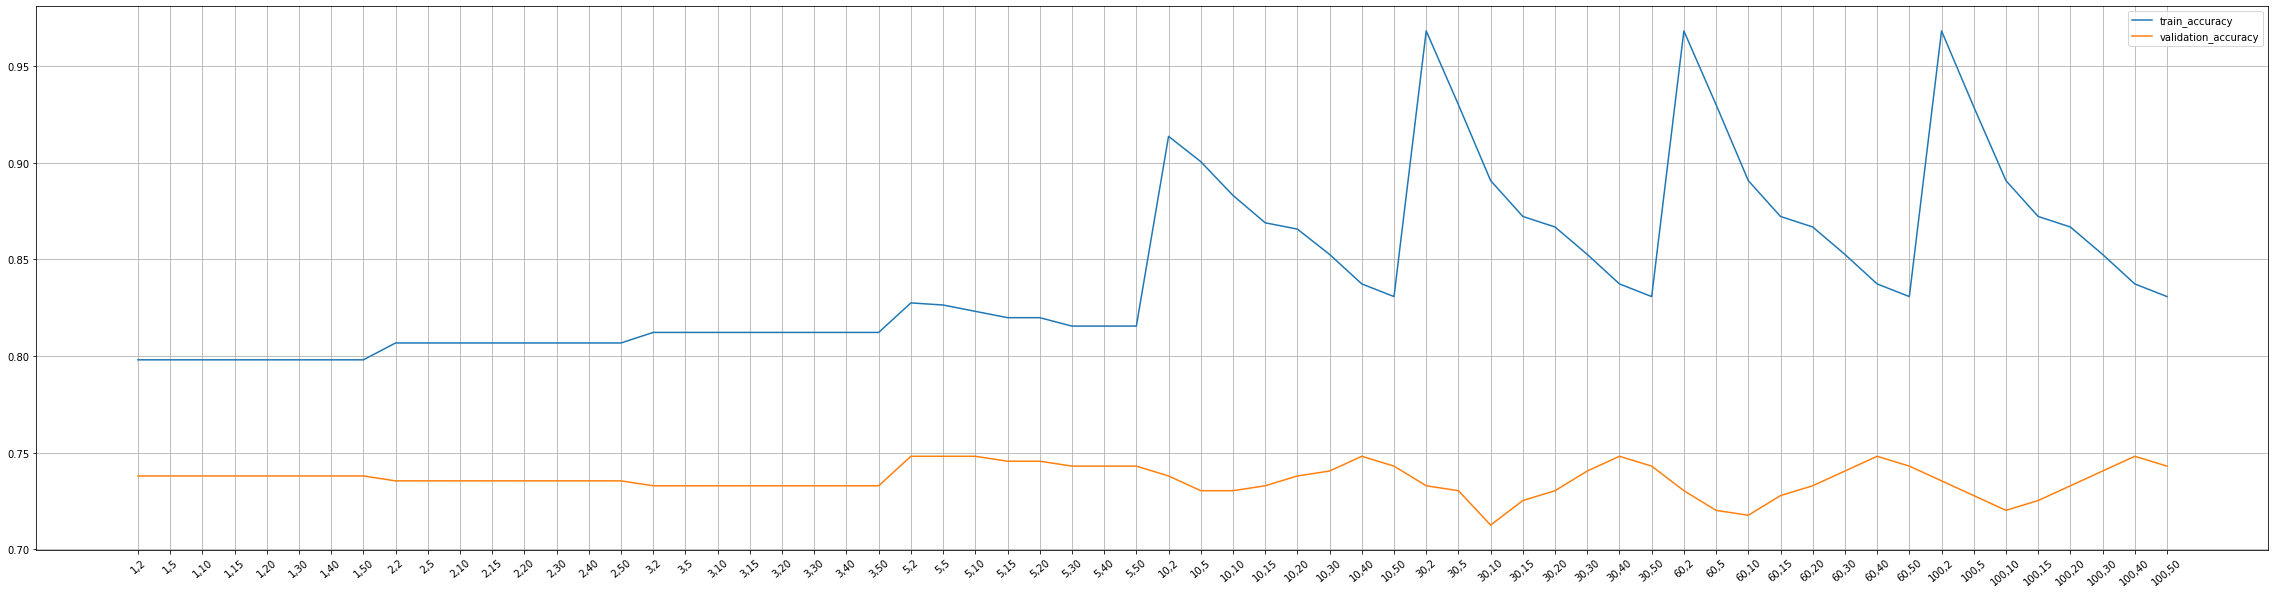

In [66]:
plt.figure(figsize=(40,10))
plt.xticks(range(0, len(hyperparameters_values)), hyperparameters_values, rotation='40')
plt.plot(train_accuracy, label="train_accuracy")
plt.plot(validation_accuracy, label="validation_accuracy")
plt.grid()
plt.legend()

#### workshop work
Add min_samples_leaf hyperparameter in above visualisation 

### Other type of validation
Splitting our dataset in two parts is the common and easiest one, but not all the time the most effective, especially for small datasets. <br>
As you can observered, we made some hyperparameter changes. The main risk is that we could changed those hyperparameters until our model performs optimally only on the validation set and will not perform optimally/generalize in production environment.

To reduce this, we can apply another validation strategy, namek k-fold. <br>
The dataset set is split into k smaller sets. The following procedure is followed for each of the k “folds”:
- a model is trained using k-1 of the folds as training data
- the resulting model is validated on the remaining part of  the data, 1 fold

![kfold](../resources/images/kfold.png)




In [74]:
dt_v5 = DecisionTreeClassifier(max_depth=5, random_state=random_state)

In [75]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

In [87]:
cross_val_dt_stats = cross_validate(dt_v5, dataset[feature_set_v3], dataset[target], cv = kfold, scoring="accuracy", return_train_score=True )


In [88]:
cross_val_dt_stats

{'fit_time': array([0.0038197 , 0.00386667, 0.00352383, 0.00390911, 0.00362325]),
 'score_time': array([0.00154519, 0.00136709, 0.0014143 , 0.00143003, 0.00129771]),
 'test_score': array([0.8129771 , 0.79770992, 0.78625954, 0.7519084 , 0.79310345]),
 'train_score': array([0.80515759, 0.81948424, 0.80038204, 0.81757402, 0.81679389])}

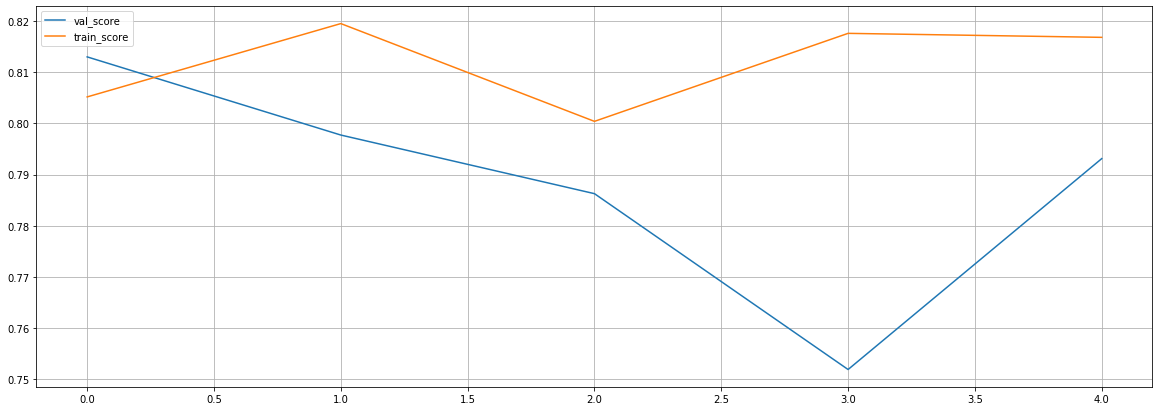

In [89]:
plt.figure(figsize=(20,7))
plt.plot(cross_val_dt_stats["test_score"], label="val_score")
plt.plot(cross_val_dt_stats["train_score"], label="train_score")
plt.legend()
plt.grid()

In [90]:
cross_val_dt_stats["test_score"].mean()

0.7883916820215846

### DecisionTreeClassifier conclusions 

The main steps from any ML projects are :
- data access
- data exploration
- feature enginner (clean, transform, generate new features)
- create an ML modeling 
- model validation
- model interpretation
- model improvement (usually starting again from first step)

## RandomForestClassifier

A random forest is a ML model that trains a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

![RandomForest](../resources/images/random_forest.png) <br>


Main characteristics :
- decision trees from RF are independent, so they can be trained in the same time, taking advantage of parallel computing
- each tree is trained with a slightly different input of data
- the average predictions is always better than a single model prediction. 

In [75]:
feature_set_v4

['sex_cat',
 'age',
 'age_missing',
 'fare',
 'fare_missing',
 'embarked_cat',
 'pclass']

### Randomness from RandomForest 
Randomness in RF is given by :
- random input for each tree (hyperparameter bootstrap)
- random sample of features for each split node (hyperparameter max_features)


In [135]:
train_accuracy = []
validation_accuracy = []
for i in range(10):
    rf = RandomForestClassifier(n_estimators=n_estimator, max_depth=5, random_state=None)
    rf.fit(train[feature_set_v3], train[target])
    
    train_accuracy.append(accuracy_score(train[target], rf.predict(train[feature_set_v3])))
    validation_accuracy.append(accuracy_score(validation[target], rf.predict(validation[feature_set_v3])))
    

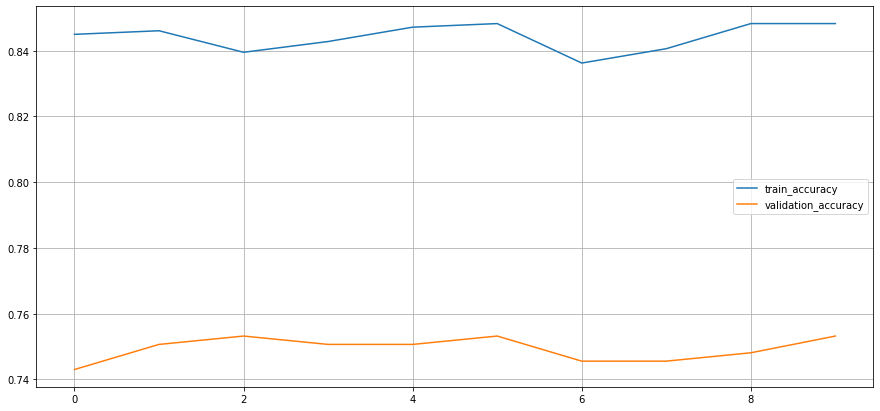

In [136]:
plt.figure(figsize=(15,7))
plt.plot(train_accuracy, label="train_accuracy")
plt.plot(validation_accuracy, label="validation_accuracy")
plt.grid()
plt.legend()

Why do you have differente results even if we initialized the RF with the same hyperparameters ?




### Add new data
Training a model with the best features will have the biggest impact for model performance. <br>
The ability to dig into the data and derive new features, insights is what makes a good ML engineer a great one.

In [142]:
feature_set_v3

['sex_cat', 'age', 'age_missing', 'fare', 'fare_missing', 'embarked_cat']

In [143]:
dataset.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,sex_cat,embarked_cat,age_missing,fare_missing
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,0,2,False,False
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,2,False,False
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,2,False,False


In [144]:
feature_set_v4 = feature_set_v3 + ["pclass"]

In [115]:
train, validation = train_test_split(dataset, train_size=0.7, random_state=random_state, stratify = dataset.survived)

In [137]:
rf = RandomForestClassifier(n_estimators=30, max_depth=6, n_jobs=3, random_state=None)
rf.fit(train[feature_set_v4], train[target])

print(f"training accuracy {accuracy_score(train[target], rf.predict(train[feature_set_v4]))}")
print(f"validation accuracy {accuracy_score(validation[target], rf.predict(validation[feature_set_v4]))}")

training accuracy 0.868995633187773
validation accuracy 0.7837150127226463


### k-fold for RandomForestClassifier

In [138]:
rf = RandomForestClassifier(n_estimators=30, max_depth=6, n_jobs=3, random_state=random_state)

#### workshop work

In [139]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
cross_val_rf_stats = cross_validate(rf, dataset[feature_set_v4], dataset[target], cv=cv, scoring="accuracy", return_train_score=True)
cross_val_rf_stats

{'fit_time': array([0.81971407, 0.05808496, 0.05489993, 0.05374408, 0.06761217]),
 'score_time': array([0.10690093, 0.10761404, 0.10826278, 0.10503983, 0.10587883]),
 'test_score': array([0.80916031, 0.82442748, 0.83587786, 0.79007634, 0.79693487]),
 'train_score': array([0.85577841, 0.84527221, 0.84718243, 0.85768863, 0.85782443])}

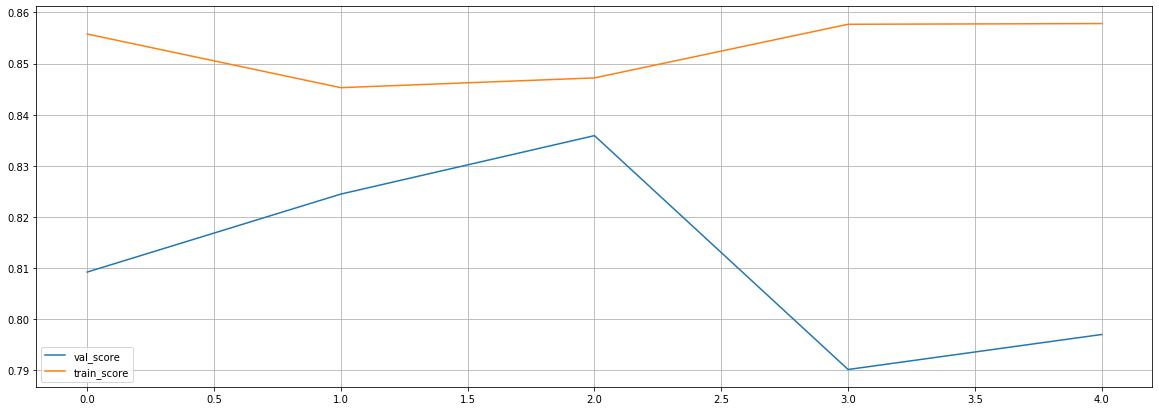

In [140]:
plt.figure(figsize=(20,7))
plt.plot(cross_val_rf_stats["test_score"], label="val_score")
plt.plot(cross_val_rf_stats["train_score"], label="train_score")
plt.legend()
plt.grid()

In [141]:
cross_val_rf_stats["test_score"].mean()

0.8112953701266414

# Regression algorithms - DecisionTree and RandomForest

TODO
- L1 vs L2

### Imports

In [145]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

In [146]:
# dataset.to_csv("../dataset/titanic/tmp/titanic_v4.csv", index=False)

In [147]:
dataset_reg = pd.read_csv("../dataset/titanic/tmp/titanic_v4.csv")

In [148]:
dataset_reg.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,sex_cat,embarked_cat,age_missing,fare_missing
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,0,2,False,False
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,2,False,False
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,2,False,False
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,1,2,False,False
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,2,False,False
5,1,True,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,1,2,False,False
6,1,True,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,0,2,False,False
7,1,False,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,1,2,False,False
8,1,True,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,0,2,False,False
9,1,False,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,1,0,False,False


### Feature selection

In [149]:
feature_set_reg_v1 = ["pclass", "survived", "sex_cat", "fare", "embarked_cat"]
target_reg = "age"

### Train/validation split

In [150]:
train_reg, validation_reg = train_test_split(dataset_reg, train_size=0.7, random_state=random_state)

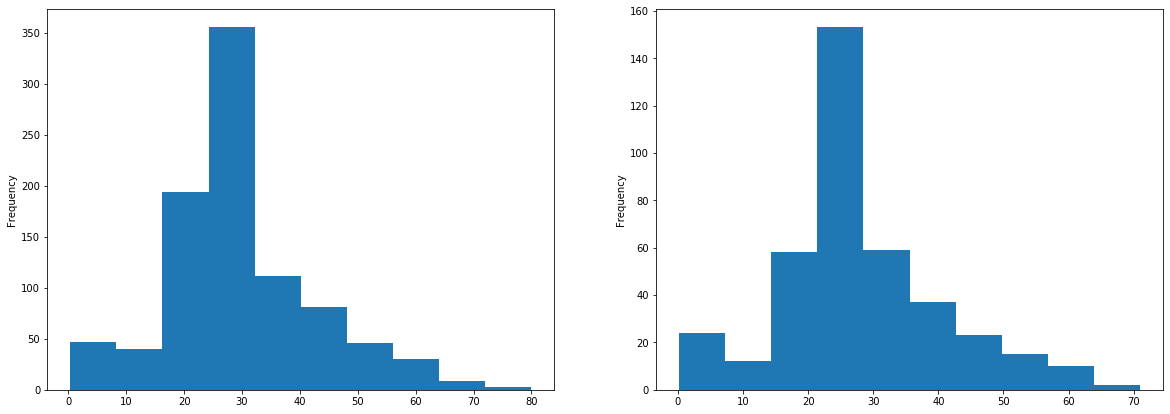

In [151]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
train_reg.age.plot.hist()
plt.subplot(1,2,2)
validation_reg.age.plot.hist()

### DecisionTreeRegression v 1

In [167]:
dt_reg_v1 = DecisionTreeRegressor(criterion="mae", max_depth=4)
dt_reg_v1.fit(train_reg[feature_set_reg_v1], train_reg[target_reg])

DecisionTreeRegressor(criterion='mae', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### Prediction description

In [168]:
list(zip(dt_reg_v1.predict(validation_reg[feature_set_reg_v1][:10]), validation_reg[target_reg][:10]))

[(37.0, 37.0),
 (35.0, 48.0),
 (26.0, 0.1667),
 (28.0, 22.0),
 (35.0, 19.0),
 (28.0, 20.0),
 (35.0, 49.0),
 (26.0, 5.0),
 (21.0, 21.0),
 (26.0, 19.0)]

### Model validation

In [166]:
print(f"training MAE : {mean_absolute_error(train_reg[target_reg], dt_reg_v1.predict(train_reg[feature_set_reg_v1]))}")
print(f"validation MAE : {mean_absolute_error(validation_reg[target_reg], dt_reg_v1.predict(validation_reg[feature_set_reg_v1]))}")


training MAE : 8.617264277146763
validation MAE : 8.746329417942937


In [169]:
print(f"training MAE : {mean_absolute_error(train_reg[target_reg], dt_reg_v1.predict(train_reg[feature_set_reg_v1]))}")
print(f"validation MAE : {mean_absolute_error(validation_reg[target_reg], dt_reg_v1.predict(validation_reg[feature_set_reg_v1]))}")


training MAE : 8.26774017467249
validation MAE : 8.170695419847329


### Hyperparameter tuning

In [157]:
train_mae = []
validation_mae = []
max_depth_values = [1, 2, 3, 6, 10, 20, 40]

for max_depth in max_depth_values:
    dt_reg = DecisionTreeRegressor(max_depth=max_depth)
    dt_reg.fit(train_reg[feature_set_reg_v1], train_reg[target_reg])
    
    train_mae.append(mean_absolute_error(train_reg[target_reg], dt_reg.predict(train_reg[feature_set_reg_v1])))
    validation_mae.append(mean_absolute_error(validation_reg[target_reg], dt_reg.predict(validation_reg[feature_set_reg_v1])))

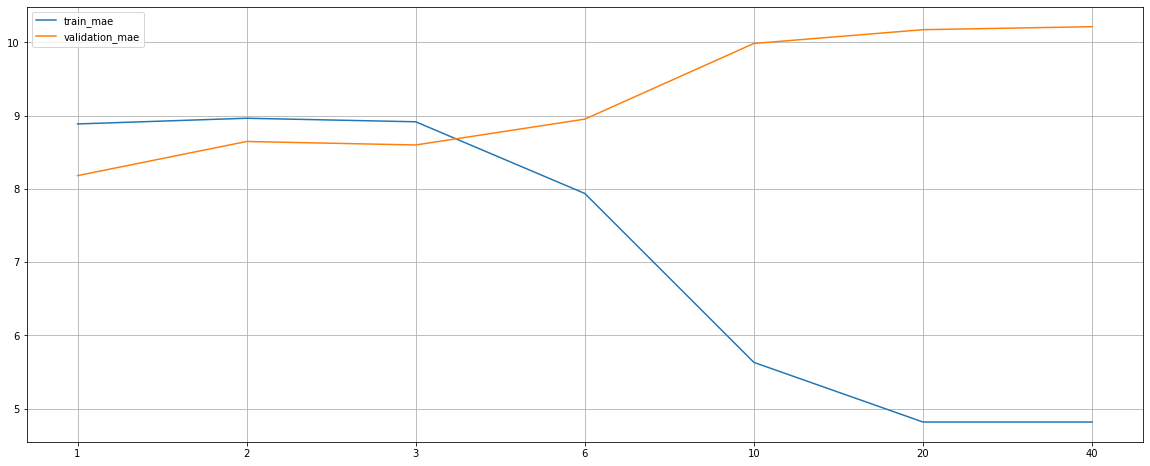

In [158]:
plt.figure(figsize=(20,8))
plt.xticks(range(0, len(max_depth_values)), max_depth_values)
plt.plot(train_mae, label="train_mae")
plt.plot(validation_mae, label="validation_mae")
plt.legend()
plt.grid()

### kfold validation

In [205]:
dt_reg = DecisionTreeRegressor(max_depth=3)
kfold_reg = KFold(n_splits=5, shuffle=True, random_state=random_state)

In [206]:
cross_val_rf_reg_stats = cross_validate(dt_reg, dataset_reg[feature_set_reg_v1], dataset_reg[target_reg], cv = kfold_reg, scoring="neg_mean_absolute_error", return_train_score=True)


In [207]:
cross_val_rf_reg_stats

{'fit_time': array([0.00316405, 0.00330806, 0.0028851 , 0.00318289, 0.00307107]),
 'score_time': array([0.00118899, 0.00129795, 0.00116086, 0.00119209, 0.00159788]),
 'test_score': array([-8.37697642, -8.99243544, -8.76024528, -8.95316921, -9.31091116]),
 'train_score': array([-8.71338383, -8.43662238, -8.49037762, -8.66519122, -8.40752761])}

In [208]:
abs(cross_val_rf_reg_stats["test_score"].mean())

8.878747502332837